In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from textblob import TextBlob
import matplotlib.pyplot as plt

# Checking thr response code

In [2]:
webpage=requests.get("https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=1000")
webpage

<Response [200]>

# Checking the text in the webapages using  .text 

In [3]:
webpage=requests.get("https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=1000").text
webpage

'<!doctype html>\n\n<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 8]>    <html class="no-js lt-ie9 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-GB"> <!--<![endif]-->\n\t<head>\n\t\t<meta charset="utf-8">\n\n\t\t<title>British Airways Customer Reviews - SKYTRAX</title>\n\n\t\t<!-- Google Chrome Frame for IE -->\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\n\t\t<!-- mobile meta -->\n\t\t<meta name="HandheldFriendly" content="True">\n\t\t<meta name="MobileOptimized" content="320">\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no"/>\n\t\t<!-- icons & favicons -->\n\t\t<link rel="apple-touch-icon" href="https://www.airlinequality.com/wp-co

In [4]:
soup=BeautifulSoup(webpage,"lxml")
reviews=soup.find_all("div",class_="text_content")
len(reviews)

1000

# Adding Every review into the empty list

In [5]:


CUSTOMER_REVIEWS=[]
for i in reviews:
    CUSTOMER_REVIEWS.append(i.get_text())
    

In [6]:
CUSTOMER_REVIEWS

['✅ Trip Verified |  Old A320 with narrow pitch. Flight perfectly on time, with constant announcements from cockpit. Friendly staff, free chips and water. Quick luggage delivery at T5.',
 '✅ Trip Verified |  Another BA Shambles. Started off well with excellent check in at first at t5, mid afternoon so avoided the early morning, evening scrum. Into the Concorde lounge, excellent service again. Great choice of cocktails, wine etc. Food ok a bit overcooked but pretty reasonable. Called to the boarding gate. Chaos, people jostling for position to get on the plane. People with children under 5 called before the 8 people in first bankrolling the flight and most of them well over 5. We get on to be told that none of the lights in first can be dimmed at all, so the lights were on all night. It was like being detained and interrogated! Excellent wine and champagne selection. Dinner menu handed out. I’ll have the prawn cocktail to start please. No you won’t as they’ve only loaded one for 8 peopl

# Converting list of reviews into DataFrame

In [7]:
df=pd.DataFrame()
df['CUSTOMER_REVIEWS']=CUSTOMER_REVIEWS
df

CUSTOMER_REVIEWS
0    ✅ Trip Verified |  Old A320 with narrow pitch....
1    ✅ Trip Verified |  Another BA Shambles. Starte...
2    Not Verified |  BA cancelled my flight home to...
3    Not Verified |  BA cancelled my flight home, t...
4    ✅ Trip Verified | Turned up 3.5 hours in advan...
..                                                 ...
995  ✅ Trip Verified |  Heathrow to Keflavik. I had...
996  ✅ Trip Verified |  London to Muscat first clas...
997  ✅ Trip Verified |  My family and I travelled f...
998  ✅ Trip Verified |  Gatwick to Madeira. The fli...
999  ✅ Trip Verified | London to Casablanca. Their ...

[1000 rows x 1 columns]


# Converting DataFrame into csv file

In [8]:
df.to_csv("CUSTOMER_REVIEWS.csv")

# Cleaning the Data

In [9]:
Reviews=pd.read_csv("CUSTOMER_REVIEWS.csv")

In [10]:
Reviews

Unnamed: 0                                   CUSTOMER_REVIEWS
0             0  ✅ Trip Verified |  Old A320 with narrow pitch....
1             1  ✅ Trip Verified |  Another BA Shambles. Starte...
2             2  Not Verified |  BA cancelled my flight home to...
3             3  Not Verified |  BA cancelled my flight home, t...
4             4  ✅ Trip Verified | Turned up 3.5 hours in advan...
..          ...                                                ...
995         995  ✅ Trip Verified |  Heathrow to Keflavik. I had...
996         996  ✅ Trip Verified |  London to Muscat first clas...
997         997  ✅ Trip Verified |  My family and I travelled f...
998         998  ✅ Trip Verified |  Gatwick to Madeira. The fli...
999         999  ✅ Trip Verified | London to Casablanca. Their ...

[1000 rows x 2 columns]

In [11]:
Reviews.CUSTOMER_REVIEWS=Reviews.CUSTOMER_REVIEWS.str.replace("✅ Trip Verified ","",regex=True)

In [12]:
Reviews

Unnamed: 0                                   CUSTOMER_REVIEWS
0             0  |  Old A320 with narrow pitch. Flight perfectl...
1             1  |  Another BA Shambles. Started off well with ...
2             2  Not Verified |  BA cancelled my flight home to...
3             3  Not Verified |  BA cancelled my flight home, t...
4             4  | Turned up 3.5 hours in advance, Terminal 5 a...
..          ...                                                ...
995         995  |  Heathrow to Keflavik. I had booked economy,...
996         996  |  London to Muscat first class. First time tr...
997         997  |  My family and I travelled from Cape Town to...
998         998  |  Gatwick to Madeira. The flight left on time...
999         999  | London to Casablanca. Their customer service...

[1000 rows x 2 columns]

In [13]:
Reviews.CUSTOMER_REVIEWS=Reviews.CUSTOMER_REVIEWS.str.replace("Not Verified ","",regex=True)

In [14]:
Reviews

Unnamed: 0                                   CUSTOMER_REVIEWS
0             0  |  Old A320 with narrow pitch. Flight perfectl...
1             1  |  Another BA Shambles. Started off well with ...
2             2  |  BA cancelled my flight home to Heathrow on ...
3             3  |  BA cancelled my flight home, the last fligh...
4             4  | Turned up 3.5 hours in advance, Terminal 5 a...
..          ...                                                ...
995         995  |  Heathrow to Keflavik. I had booked economy,...
996         996  |  London to Muscat first class. First time tr...
997         997  |  My family and I travelled from Cape Town to...
998         998  |  Gatwick to Madeira. The flight left on time...
999         999  | London to Casablanca. Their customer service...

[1000 rows x 2 columns]

In [15]:
Reviews.CUSTOMER_REVIEWS=Reviews.CUSTOMER_REVIEWS.str.replace("|","",regex=True)

# Removing flight word from reviews because which is most repeated

In [16]:

Reviews.CUSTOMER_REVIEWS=Reviews.CUSTOMER_REVIEWS.str.replace("flight","",regex=True)
Reviews.head(5)


Unnamed: 0                                   CUSTOMER_REVIEWS
0           0    Old A320 with narrow pitch. Flight perfectly...
1           1    Another BA Shambles. Started off well with e...
2           2    BA cancelled my  home to Heathrow on Dec 19t...
3           3    BA cancelled my  home, the last  of the day ...
4           4   Turned up 3.5 hours in advance, Terminal 5 at...

In [17]:
Reviews.drop("Unnamed: 0",axis=1,inplace=True)

In [18]:
Reviews

CUSTOMER_REVIEWS
0      Old A320 with narrow pitch. Flight perfectly...
1      Another BA Shambles. Started off well with e...
2      BA cancelled my  home to Heathrow on Dec 19t...
3      BA cancelled my  home, the last  of the day ...
4     Turned up 3.5 hours in advance, Terminal 5 at...
..                                                 ...
995    Heathrow to Keflavik. I had booked economy, ...
996    London to Muscat first class. First time try...
997    My family and I travelled from Cape Town to ...
998    Gatwick to Madeira. The  left on time and ar...
999   London to Casablanca. Their customer service ...

[1000 rows x 1 columns]

In [19]:
Reviews["CUSTOMER_REVIEWS"][999]

" London to Casablanca. Their customer service quality in Heathrow Terminal 3 is very patchy. For background, my initial  was with TAP Portugal which got cancelled, then rebooked to BA. My second  had further issue, and instead of requesting TAP to rebook me, BA took the liberty of rebooking a 3rd  for me - which turned out to be overbooked. This then caused me having to liaise with both TAP and BA to rebook my 4th  - I was tossed around by both customer care telling me it's not their problem. TAP can no longer rebook me on another  as they have lost the right to alter the ticket as soon as BA rebooked me on the 3rd . I was initially served by a very helpful staff who attends to my rebooking issue - the last  I was rebooked was overbooked. However, later on I was passed on to a couple of rude staff that were reluctant to serve me as it was 15 minutes past their end of shift. They were also talking about me in front of me and accused me of taking advantage of BA. This is very rude and e

In [20]:
Reviews.CUSTOMER_REVIEWS=Reviews.CUSTOMER_REVIEWS.str.replace("-","",regex=True)

In [21]:
Reviews["CUSTOMER_REVIEWS"][999]

" London to Casablanca. Their customer service quality in Heathrow Terminal 3 is very patchy. For background, my initial  was with TAP Portugal which got cancelled, then rebooked to BA. My second  had further issue, and instead of requesting TAP to rebook me, BA took the liberty of rebooking a 3rd  for me  which turned out to be overbooked. This then caused me having to liaise with both TAP and BA to rebook my 4th   I was tossed around by both customer care telling me it's not their problem. TAP can no longer rebook me on another  as they have lost the right to alter the ticket as soon as BA rebooked me on the 3rd . I was initially served by a very helpful staff who attends to my rebooking issue  the last  I was rebooked was overbooked. However, later on I was passed on to a couple of rude staff that were reluctant to serve me as it was 15 minutes past their end of shift. They were also talking about me in front of me and accused me of taking advantage of BA. This is very rude and extr

# Functions to get subjectivity and polarity

In [22]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
Reviews["Subjectivity"]=Reviews["CUSTOMER_REVIEWS"].apply(getSubjectivity)
Reviews["Polarity"]=Reviews["CUSTOMER_REVIEWS"].apply(getPolarity)

In [23]:
Reviews

CUSTOMER_REVIEWS  Subjectivity  Polarity
0      Old A320 with narrow pitch. Flight perfectly...      0.533333  0.286905
1      Another BA Shambles. Started off well with e...      0.537500  0.293125
2      BA cancelled my  home to Heathrow on Dec 19t...      0.436667 -0.227500
3      BA cancelled my  home, the last  of the day ...      0.364394 -0.020455
4     Turned up 3.5 hours in advance, Terminal 5 at...      0.374123 -0.021053
..                                                 ...           ...       ...
995    Heathrow to Keflavik. I had booked economy, ...      0.469444  0.247222
996    London to Muscat first class. First time try...      0.470987  0.174588
997    My family and I travelled from Cape Town to ...      0.466667  0.027778
998    Gatwick to Madeira. The  left on time and ar...      0.449433  0.063831
999   London to Casablanca. Their customer service ...      0.312910  0.006706

[1000 rows x 3 columns]

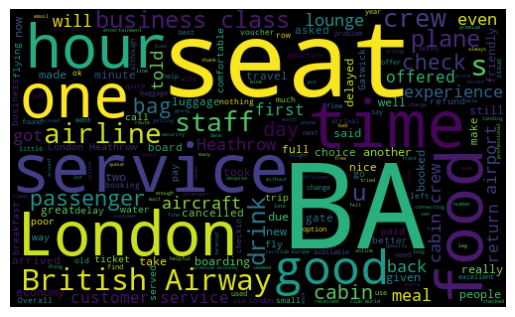

In [24]:
#visualise the data using wordcloud #pllot world cloud
allwords= ' '.join([reviews for reviews in Reviews["CUSTOMER_REVIEWS"]])
WordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=120).generate(allwords)
plt.imshow(WordCloud,interpolation="bilinear")
plt.axis("off")
plt.show()

# Function for creating the neagtive,neutral,positive analysis


In [25]:
def getAnalysis(score):
    if score<0:
        return "Negative"
    elif score==0:
        return "Neutral"
    else:
        return 'Positive'
Reviews["Analysis"]=Reviews["Polarity"].apply(getAnalysis)


In [26]:
Reviews

CUSTOMER_REVIEWS  Subjectivity  \
0      Old A320 with narrow pitch. Flight perfectly...      0.533333   
1      Another BA Shambles. Started off well with e...      0.537500   
2      BA cancelled my  home to Heathrow on Dec 19t...      0.436667   
3      BA cancelled my  home, the last  of the day ...      0.364394   
4     Turned up 3.5 hours in advance, Terminal 5 at...      0.374123   
..                                                 ...           ...   
995    Heathrow to Keflavik. I had booked economy, ...      0.469444   
996    London to Muscat first class. First time try...      0.470987   
997    My family and I travelled from Cape Town to ...      0.466667   
998    Gatwick to Madeira. The  left on time and ar...      0.449433   
999   London to Casablanca. Their customer service ...      0.312910   

     Polarity  Analysis  
0    0.286905  Positive  
1    0.293125  Positive  
2   -0.227500  Negative  
3   -0.020455  Negative  
4   -0.021053  Negative  
..        ...       ...  
995  0.247222  Positive  
996  0.174588  Positive  
997  0.027778  Positive  
998  0.063831  Positive  
999  0.006706  Positive  

[1000 rows x 4 columns]

In [27]:
#printing reviews from strongest positive to lowest positive based on analysis score
j=1
sorteddf=Reviews.sort_values(by=["Polarity"])
for i in range(0,sorteddf.shape[0]):
    if(sorteddf["Analysis"][i]=="Positive"):
        print(str(j)+')'+sorteddf["CUSTOMER_REVIEWS"][i])
        print()
        j=j+1

1)  Old A320 with narrow pitch. Flight perfectly on time, with constant announcements from cockpit. Friendly staff, free chips and water. Quick luggage delivery at T5.

2)  Another BA Shambles. Started off well with excellent check in at first at t5, mid afternoon so avoided the early morning, evening scrum. Into the Concorde lounge, excellent service again. Great choice of cocktails, wine etc. Food ok a bit overcooked but pretty reasonable. Called to the boarding gate. Chaos, people jostling for position to get on the plane. People with children under 5 called before the 8 people in first bankrolling the  and most of them well over 5. We get on to be told that none of the lights in first can be dimmed at all, so the lights were on all night. It was like being detained and interrogated! Excellent wine and champagne selection. Dinner menu handed out. I’ll have the prawn cocktail to start please. No you won’t as they’ve only loaded one for 8 people and the guy in 1A got it. I bet he felt

In [28]:
#printing reviews from strongest negative, based on analysis score
j=1
sorteddf=Reviews.sort_values(by=["Polarity"],ascending=False)
for i in range(0,sorteddf.shape[0]):
    if(sorteddf["Analysis"][i]=="Negative"):
        print(str(j)+')'+sorteddf["CUSTOMER_REVIEWS"][i])
        print()
        j=j+1

1)  BA cancelled my  home to Heathrow on Dec 19th. On the face of it, that was sensible as the weather in Iceland was appalling. However, what was not acceptable was that the  was cancelled only 4 hours before take off time by which time I was already struggling through dreadful driving conditions to get to the airport. I got nowhere near before the conditions became too bad. If they had taken advice they would have spared everyone the need to try and travel on roads that all ended up closed. I am now booked onto the  on the 21st and downgraded for my sins. Having checked today, as I type they have not cancelled the  on the 20th despite the road to Keflavík being closed! Do they not check these things? Any help from BA offered  not really.

2)  BA cancelled my  home, the last  of the day into Heathrow, and tried to push me onto another  to London City 3 hours later! My car was at Heathrow. I didn't want to try and cross London late at night on public transport with luggage, especially 

# Ploting Polarity and Subjectivity

Text(0, 0.5, 'Subjectivity')

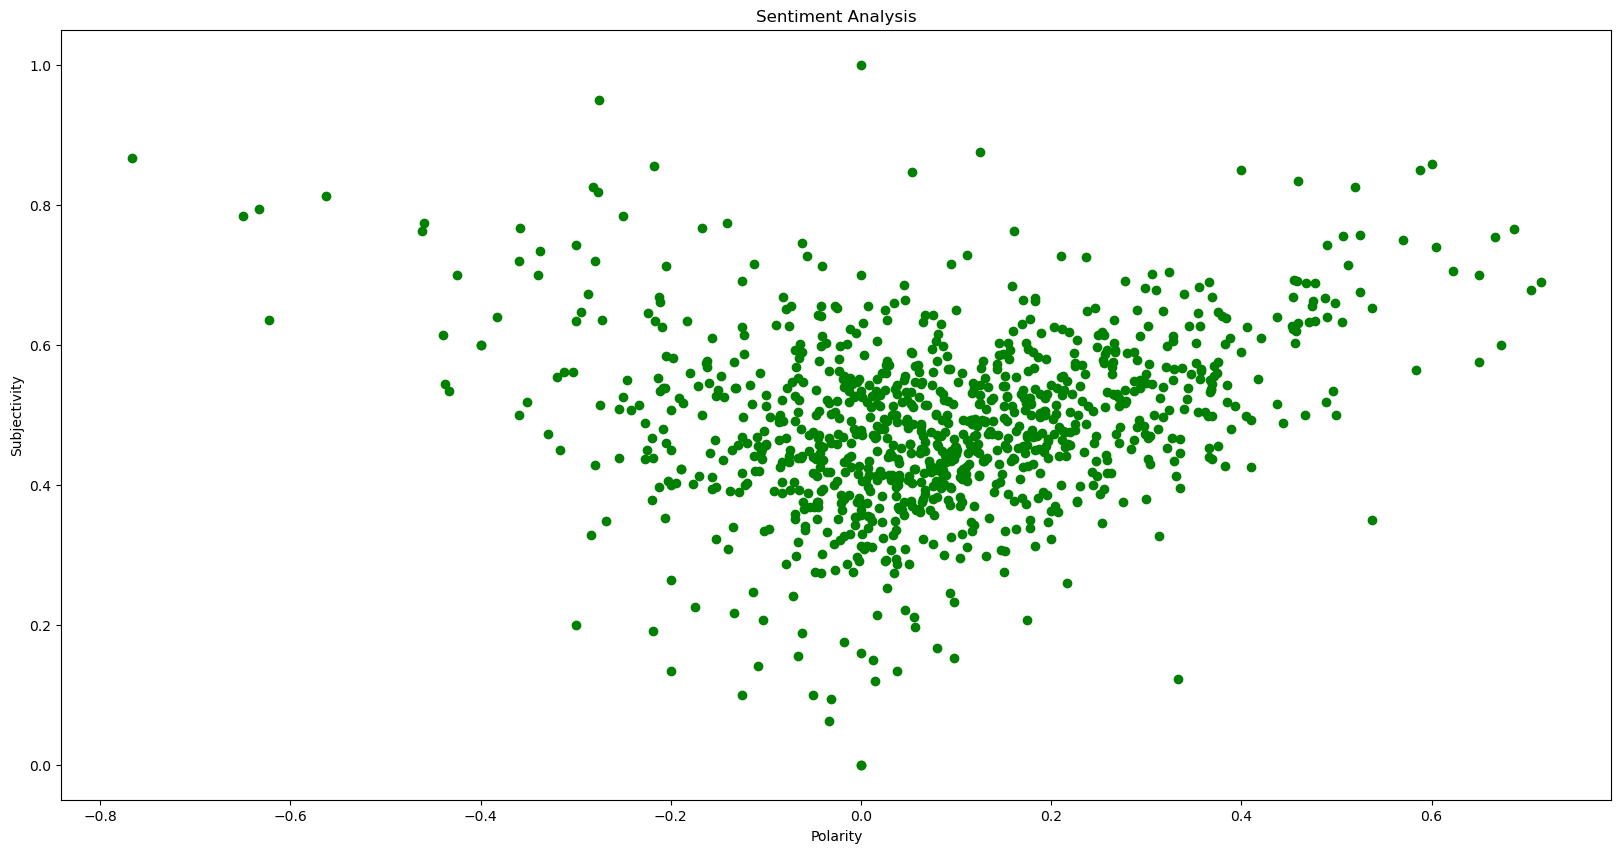

In [29]:
plt.figure(figsize=(20,10))
for i in range(0,Reviews.shape[0]):
    plt.scatter(Reviews["Polarity"][i],Reviews["Subjectivity"][i],color="Green")
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")


In [30]:
# Percentage of positive Reviews
pos_reviews_perrcent=Reviews[Reviews.Analysis=='Positive']
pos_reviews_perrcent=pos_reviews_perrcent["CUSTOMER_REVIEWS"]
print("percentage of positive Reviews is:",round((pos_reviews_perrcent.shape[0]/Reviews.shape[0]*100),1))

percentage of positive Reviews is: 67.3


In [31]:
#Percentage of Neagtive Reviews
neg_reviews_perrcent=Reviews[Reviews.Analysis=='Negative']
neg_reviews_perrcent=neg_reviews_perrcent["CUSTOMER_REVIEWS"]
print("percentage of negative reviews is:",round((neg_reviews_perrcent.shape[0]/Reviews.shape[0]*100),1))

percentage of negative reviews is: 31.8


# Showing the value counts 


In [32]:
Reviews['Analysis'].value_counts()

Positive    673
Negative    318
Neutral       9
Name: Analysis, dtype: int64

# Visualising the Counts

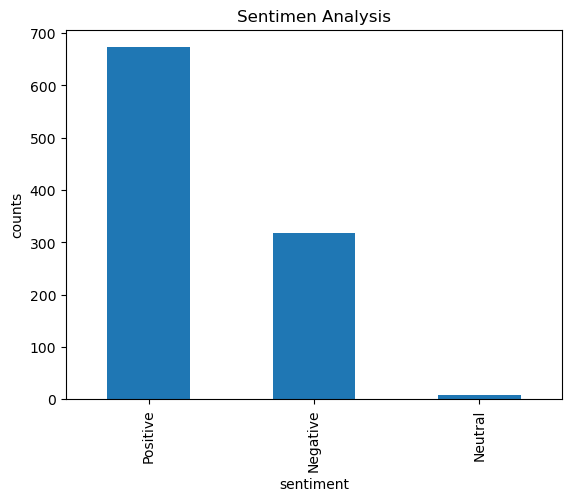

In [33]:
plt.title("Sentimen Analysis")
plt.xlabel('sentiment')
plt.ylabel("counts")
Reviews["Analysis"].value_counts().plot(kind="bar")
plt.show()